In [3]:
import numpy as np
import pandas as pd

# Linear Regression #

## Preliminary

#### Vectors & Matrices in Python
- A vector is a list of numbers, and can be conssidered as a mx1 matrix. It is like list in Python, ArrayList or List in Java, array in C

In [ ]:
myvec = [1.,2.,3.]

- In Numpy, a vector is express as followed
- Good reason to use Numpy iss that vector operations can be performeed

In [ ]:
v1 = np.array([1,2])
v2 = np.array([3.,1.])
v1+v2, v1*v2

(array([4., 3.]), array([3., 2.]))

- A matrix is a table of numbers, in Python/Java/C it can be expressed as a list of lists

In [ ]:
mymat = [[1,2],[3,4],[6,7]]
mymat

[[1, 2], [3, 4], [6, 7]]

- In numpy, you can do matrix matrix dot product

In [ ]:
m1 = np.array([[1,2],[3,4],[6,7]]) #3x2
m2 = np.array([[1,-1,0],[1,-1,0]]) #2x3
np.dot(m1,m2) #3x3

array([[  3,  -3,   0],
       [  7,  -7,   0],
       [ 13, -13,   0]])

- In Numpy you can also do matrix-vector dot product

In [ ]:
m1 = np.array([[1,2],[3,4],[6,7]]) #3x2
m2 = np.array([[1,-1,0],[1,-1,0]]) #2x3
np.dot(m1,m2) #3x3

In [ ]:
m1 = np.array([[1,2],[3,4],[6,7]]) #3x2
v = np.array([[1],[2]]) #2x1
np.dot(m1,v)

array([[ 5],
       [11],
       [20]])

In [ ]:
m1 = np.array([[1,2],[3,4],[6,7]]) #3x2
v = np.array([1,2]) #2
np.dot(m1,v)

array([ 5, 11, 20])

#### Applying a function elementwise to a list/matrix
- When you defiinite a function on sscaler, it can nopt be applied to list elementwise
- you can achieve this ussing "vectorization" (making your function appliable to vector versions

In [ ]:
def mydiff(a, b):
    return (a-b)*(a-b)
mydiff([1,2],[-1,4]) #wrong results

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
np.vectorize(mydiff)([1,2],[-1,4])

array([4, 4])

- apply to a matrix

In [ ]:
np.vectorize(mydiff)([[1,2],[3,4]],[[-1,4],[0,0]])

array([[ 4,  4],
       [ 9, 16]])

## Contour plot

- Write a function that takes in a function and the bound box, and plot the contour. Here f takess two argument


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def contour_plot(f, xmin = 0, xmax = 1, ymin = 0, ymax = 1, level = 100, points = None):
    xlist = np.linspace(xmin, xmax, 100)
    ylist = np.linspace(ymin, ymax, 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.vectorize(f)(X, Y)
    cp = plt.contour(X, Y, Z, level)
    x = []; y = []
    if points is not None:
      points = np.array(points)
      for i in range(points.shape[0]):
        x.append(points[i][0])
        y.append(points[i][1])
      plt.plot(x, y, '--m')
    plt.show()

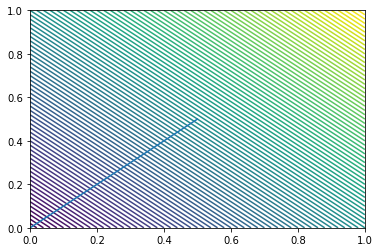

In [ ]:
xlist = np.linspace(0, 1, 100)
ylist = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.vectorize(lambda a, b: a+b)(X, Y)
cp = plt.contour(X, Y, Z, 100)
plt.plot([0,0.5],[0,0.5])

In [ ]:
xlist = np.linspace(0, 1, 4)
ylist = np.linspace(0, 1, 4)
X, Y = np.meshgrid(xlist, ylist)
print(X)
Y

[[0.         0.33333333 0.66666667 1.        ]
 [0.         0.33333333 0.66666667 1.        ]
 [0.         0.33333333 0.66666667 1.        ]
 [0.         0.33333333 0.66666667 1.        ]]


array([[0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        , 1.        ]])

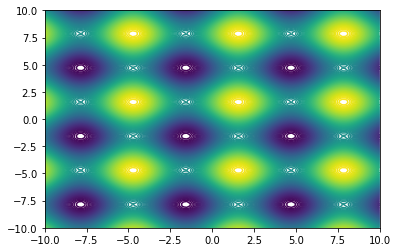

In [ ]:
# test
def sq(x1, x2):
    return np.sin(x1)+np.sin(x2)

contour_plot(sq, -10,10,-10,10)

## Linear regression of single variable ##

### write a function that calculate the square loss, give input X is a vector of dimension m, the coefficient is c is dimension 2, and label y of dimension m. Output is a scaler $\sum_i^m (c_0+c_1*x_i - y_i)^2$

In [ ]:
m = 100
X = np.random.rand(m)*20 - 10
c = np.array([4,-1])
y = 6*X + 3 + np.random.rand(m)*20 - 10
print(y)

[ 40.40280112  51.14587727  16.90724301 -17.91930772  56.0945349
 -49.60981595  42.0785831   36.85350504  45.55387917  34.26622293
  49.42687726  51.96922377  30.22110425   8.82326465  16.61317249
  17.5789167  -19.88497839 -53.62693574 -37.36125883  58.46557498
 -47.00911513  -7.54045082  -1.04959088 -34.37425646 -39.94839112
   3.97657134  56.67501051  36.83884809  48.92037685   0.67814372
  24.42003666 -13.59950567 -41.26976884 -22.65265427  -5.15451835
  47.59289683  58.37958634  56.621497   -28.5549427   49.51035411
  29.81325588 -41.8670998  -53.51527387 -31.66995237 -39.96997797
  31.92893983 -24.86266169  42.27791543  37.61524673 -29.35767544
  58.43013416  57.15615972 -48.32611293  67.49989344 -55.89422694
  44.71679639  38.95834199 -58.08820405  38.69630833  45.75598847
 -19.914822    35.7817081  -29.48544408  55.56160291  -1.39241943
  11.04028506 -11.80364433  43.99657122 -56.77447835 -47.23973704
 -43.64088001 -31.44331996  33.60408307  36.03696699 -18.59725511
  22.138121

In [ ]:
def square_loss(X, c, y):
    n = 0
    for i in range(len(X)):
        n = n + (c[0] + c[1] * X[i] - y[i])*(c[0] + c[1] * X[i] - y[i])
    return n

In [ ]:
def square_loss2(c1, c2):
  return square_loss(X, [c1,c2], y)

In [ ]:
square_loss2(2,3)

244

In [ ]:
square_loss2v = np.vectorize(square_loss2)

In [ ]:
square_loss2v([[0]],[[1]])

array([[0]])

### Feed your square loss function to your countour plot

[1, 0.75, 0] [2, 1.75, 0]


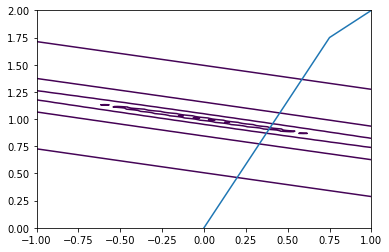

In [ ]:
contour_plot(square_loss2, -1,1,0,2, [1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1, 10, 100, 1000],[[1,2],[.75,1.75],[0,0]])

### Write a function that calculate the gradient. Input is the same as before, output is a vector of dimension 2, which gives the derivative with regard to $c_0$ and $c_1$, $\partial J_\theta(x)/\partial\theta_k$

In [ ]:
def gradient(X, c, y):
    d0 = 0; d1 = 0;
    for i in range(len(X)):
        d0 = d0 + 2*(c[0] + c[1] * X[i] - y[i])
        d1 = d1 + 2*X[i]*(c[0] + c[1] * X[i] - y[i])
    return np.array([d0, d1])


In [ ]:
gradient(X, c, y)

[-20, -92]

### Write a function that find the optimal regresion coefficient

In [ ]:
def linear_regression(X, y, start = np.array([0,0]), stepSize = 5E-3, tol = 1E-3, maxIter = 400):
    # start from an initial guesss
    c = np.array(start)
    # define alpha
    points = [c]
    m = X.shape[0]
    iter = 0
    # itractively change c by gradient desscent until the square loss does not change much
    while True and iter < maxIter:
      iter = iter + 1
      grad = gradient(X, c, y)
      print('gradient norm = ', np.linalg.norm(grad), ', iteration = ', iter, end='\r') 
      c = c - stepSize/m * grad
      points.append(c)
      if np.linalg.norm(grad) <= tol:
        break
    print('gradient norm = ', np.linalg.norm(grad), ', iteration = ', iter)
    return c, np.array(points)

gradient norm =  0.0009901914820385118 , iteration =  716
[2.53149683 6.03550839]


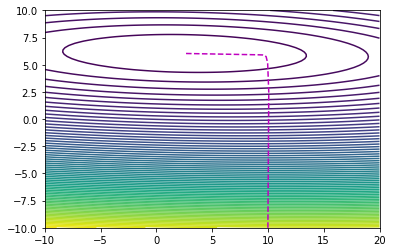

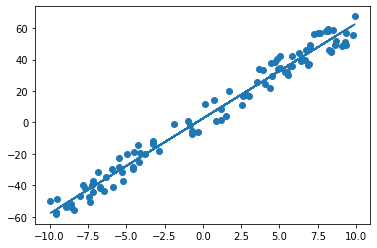

In [ ]:
c, points = linear_regression(X, y, start = [10,-10], stepSize=0.01, maxIter = 1000)
print(c)
contour_plot(square_loss2, -10,20,-10,10, 100, points)
plt.scatter(X,y)
plt.plot(X, c[1]*X + c[0])

## Linear regression of multiple variable ##

### write a function that calculate the square loss, give input X is a matrix of dimension m x n, the coefficient is c is dimension n+1, and label y of dimension m

- hint: you will find it easier to add a fake feature (called bias) with value of 1 all the time, and think of theta0 to be the coefficient for that fake feature, and theta1 to be associated with the ral feature. SSo that the feature natrix is m x (n+1), and c is dimension n+1. You can then do matrix-vectopr product, so that the loss is 
$$\|X.C - Y\|^2$$
- e.g., if your feature value is [3,4,5], then X = [[1,3],[1,4],[1,5]], let say your c = [4,-1], y = [10,9, 11], then 

In [ ]:
import numpy as np

In [ ]:
X = np.array([[1,3],[1,4],[1,5]])
c = np.array([4,-1])
y = np.array([10,9,11])
# X.c
np.dot(X,c)
# X.c - y 
np.dot(X, c) - y
# ||x.c-y||
np.linalg.norm(np.dot(X, c) - y)**2

305.99999999999994

In [ ]:
def square_loss(X, c, y):
    # hint, you can append a column of 1 to the left of the matrix. To get a matrix of constant, usse np.constant
    temp = np.ones((X.shape[0], 1))
    #temp = np.full((X.shape[0], 1),1)
    X2 = np.concatenate((temp, X), 1)
    print(X2)
    return np.linalg.norm(np.dot(X2, c) - y)**2

In [ ]:
N = 10
a = np.random.rand(N,N)
b = np.ones((N,1))
print(b)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


- test

In [ ]:
import numpy as np
X = np.array([[2,3],[4,6],[5,7],[-5,8]])
c = np.array([1,1,1])
y = np.array([6, 11, 13, 4])

In [ ]:
square_loss(X, c, y)

[[1. 1.]
 [1. 2.]
 [1. 3.]]


5.000000000000001

In [ ]:
def gradient(X, c, y):
    n = X.shape[1]
    d = []

    for j in range(n):
      d.append(np.dot((np.dot(X, c) - y), X[:,j])/m)
    return np.array(d)


In [ ]:
m = X.shape[0]
X2 = np.concatenate((np.ones((m, 1)), X), 1)
gradient(X2, c, y)


#%temp = np.ones(Xshape[1])

(4, 3)
(3,)
(4,)

(4, 3)
(3,)
(4,)

(4, 3)
(3,)
(4,)



array([0., 0., 0.])

In [ ]:
def linear_regression(X, y, start = None, stepSize = 5E-3, tol = 1E-3, maxIter = 400):
  # Add column of ones
  m, n = X.shape
  X2 = np.concatenate((np.ones((m, 1)), X), 1)
  n = n + 1

  # start from an initial guess
  if start is None:
    c = np.full((n), 0)
  else:
    c = np.array(start)
  # define alpha
  iter = 0

  # itractively change c by gradient desscent until the square loss does not change much
  while True and iter < maxIter:
    iter = iter + 1
    grad = gradient(X2, c, y)
    print('gradient norm = ', np.linalg.norm(grad), ', iteration = ', iter, end='\r') 
    c = c - stepSize * grad
    if np.linalg.norm(grad) <= tol:
      break
  print('gradient norm = ', np.linalg.norm(grad), ', iteration = ', iter)
  return c

In [ ]:
linear_regression(X, y, maxIter = 1800, stepSize = 4E-2)

gradient norm =  0.00099990518734818 , iteration =  1462


array([0.98564486, 1.00047934, 1.00210835])

In [ ]:
#temp = np.ones((X.shape[0], 1))
    #temp = np.full((X.shape[0], 1),1)
m = X.shape[0]
X2 = np.concatenate((np.ones((m, 1)), X), 1)
X2

array([[1., 2., 3.],
       [1., 4., 6.],
       [1., 5., 7.]])

In [ ]:
m,n = X.shape
m

3

In [39]:
class lr:
  def __init__(self, step = 5E-3, tolerance = 1E-3, maxIteration = 400):
    self.stepSize = step
    self.tol = tolerance
    self.maxIter = maxIteration

  def gradient(self, X, c, y):
    m,n = X.shape
    d = []
    #for j in range(n):
    #  d.append(np.dot((np.dot(X, c) - y), X[:,j])/m)
    #return np.array(d)
    Xt = np.transpose(X)
    return np.dot(Xt, (np.dot(X, c) - y))/m



  def fit(self, X, y, start = None):
    # Add column of ones
    m, n = X.shape
    X2 = np.concatenate((np.ones((m, 1)), X), 1)
    n = n + 1

    # start from an initial guess
    if start is None:
      c = np.full((n,1), 0)
    else:
      c = np.transpose(np.array([start]))
    # define alpha
    iter = 0
    # interactively change c by gradient desscent until the square loss does not change much
    while True and iter < self.maxIter:
      iter = iter + 1
      grad = self.gradient(X2, c, y)
      c = c - self.stepSize * grad
      if np.linalg.norm(grad) <= self.tol:
        break
    print('gradient norm = ', np.linalg.norm(grad), ', iteration = ', iter)
    self.c = c
    return self

  def predict(self, X):
    # Add column of ones
    m, n = X.shape
    X2 = np.concatenate((np.ones((m, 1)), X), 1)
    return np.dot(X2, self.c)

  def get_params(self):
    return self.c
    



In [10]:
model = 10
model = lr()

import numpy as np
X = np.array([[2,3],[4,6],[5,7],[-5,8]])
c = np.array([1,1,1])
y = np.array([6, 11, 13, 4])

model.fit(X,y)
model.predict(np.array([[2,3]]))

gradient norm =  0.04854738224652765 , iteration =  400


array([5.65584118])

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
model.predict(np.array([[2,3]]))


NameError: ignored

In [7]:
import numpy as np
x = np.array([[1],[2],[-1],[3]])
y = np.array([[3],[21],[-3],[65]])
x2 = np.concatenate((x, x**2, x**3), 1)


In [53]:
model = lr(maxIteration=8000, step=0.008)
model.fit(x2, y)
model.get_params()


gradient norm =  0.0025858243184651965 , iteration =  8000


array([[-0.95592776],
       [ 0.99901076],
       [ 0.96549879],
       [ 2.0101196 ]])

In [46]:
model2 = LinearRegression()
model2.fit(x2,y)
model2.coef_, model2.intercept_

(array([[1., 1., 2.]]), array([-1.]))

In [37]:
np.transpose(np.array([[1,2,3]]))

array([[1],
       [2],
       [3]])

In [23]:
class logr:
  def __init__(self, step = 5E-3, tolerance = 1E-3, maxIteration = 400):
    self.stepSize = step
    self.tol = tolerance
    self.maxIter = maxIteration
    
  def crop(self, x):
    return np.minimum(np.maximum(x, -100), 100)

  def gradient(self, X, c, y):
    m,n = X.shape
    d = []
    Xt = np.transpose(X)
    return np.dot(Xt, (1/(1 + np.exp(self.crop(-np.dot(X, c)))) - y))/m

  def fit(self, X, y, start = None):
    # Add column of ones
    m, n = X.shape
    X2 = np.concatenate((np.ones((m, 1)), X), 1)
    n = n + 1

    # scale the X
    scale = [max(max(abs(row)), 0.0001) for row in np.transpose(X2)]
    X2 = X2 / scale

    # start from an initial guess
    if start is None:
      c = np.transpose([np.random.uniform(-1, 1, n)])
    else:
      c = np.transpose(np.array([start]))
    # define alpha
    iter = 0
    # interactively change c by gradient descent until the square loss does not change much
    while True and iter < self.maxIter:
      iter = iter + 1
      grad = self.gradient(X2, c, y)
      #for i in range(m):
        #grad = self.gradient(X2[i:i+1,:], c, y[i:i+1,:])
      c = c - self.stepSize * grad
      #print('gradient norm = ', np.linalg.norm(grad), ', iteration = ', iter)
      if np.linalg.norm(grad) <= self.tol:
        break
    print('gradient norm = ', np.linalg.norm(grad), ', iteration = ', iter)
    self.c = c / np.transpose([scale])
    return self

  def predict(self, X):
    # Add column of ones
    m, n = X.shape
    X2 = np.concatenate((np.ones((m, 1)), X), 1)
    return 1/(1 + np.exp(self.crop(-np.dot(X2, self.c))))

  def get_params(self):
    return self.c
    



In [7]:
model = logr(maxIteration=90000, step=8E-2)

X = np.array([[-3],[-2],[-1],[0],[1],[2],[3]])
c = np.array([[1],[1]])
y = np.array([[0],[0],[0],[0],[1],[1],[1]])

model.fit(X,y)
model.predict(np.array([[-3],[-2],[-1],[0],[1],[2],[3]]))

gradient norm =  0.000999991533947849 , iteration =  73971


array([[2.56689343e-32, 2.94986820e-11],
       [2.45006954e-22, 6.25738356e-08],
       [2.33856252e-12, 1.32716632e-04],
       [2.18339417e-02, 2.19701869e-01],
       [9.99999995e-01, 9.98328486e-01],
       [1.00000000e+00, 9.99999211e-01],
       [1.00000000e+00, 1.00000000e+00]])

In [1]:
from google.colab import files
uploaded = files.upload()

Saving binary.csv to binary.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['binary.csv']))

In [5]:
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [7]:
y2 = df[["admit"]].values
x2 = df[["gre","gpa","rank"]].values

gradient norm =  9.998203142257407e-06 , iteration =  6406


label
0.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

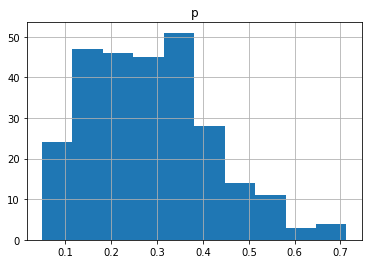

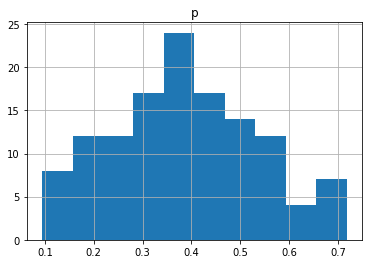

In [24]:
model = logr(step=1, maxIteration=10000, tolerance = 1E-5)

model.fit(x2,y2)
p = model.predict(x2)

dfp = pd.DataFrame(np.concatenate((p,df[["admit"]].values), axis=1), columns = ["p", "label"])
dfp.groupby('label').hist()
#dfp.plot.hist(alpha=0.5)



In [44]:
from sklearn.metrics import auc, roc_curve
print(dfp["p"], dfp["label"])
fpr, tpr, thresholds = roc_curve(dfp["label"], dfp["p"], pos_label=1)
auc(fpr, tpr)


0      0.189461
1      0.317686
2      0.717642
3      0.149010
4      0.098033
         ...   
395    0.489902
396    0.185106
397    0.187057
398    0.468037
399    0.324835
Name: p, Length: 400, dtype: float64 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: label, Length: 400, dtype: float64


0.6919183179025699

In [27]:
df[["admit"]].values.shape
p.shape


(400, 1)

In [91]:
X = np.array([[-3,3],[-2,3],[-1,3],[0,3],[1,3],[2,3],[3,3]])
X[2:3,:]


array([[-1,  3]])

In [25]:
c = np.array([[1],[2]])
s = np.array([[1],[2]])
c/s

array([[1.],
       [1.]])

In [33]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state=0)
model2.fit(x2, np.transpose(y2)[0])
p2 = model2.predict_proba(x2)

label
0.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

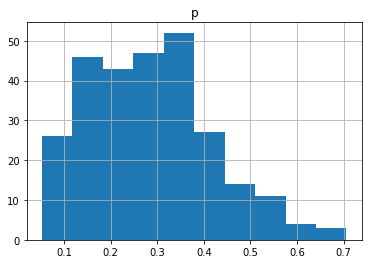

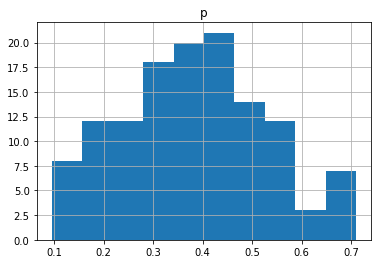

In [40]:
dfp2 = pd.DataFrame(np.concatenate((np.transpose([p2[:,1]]), df[["admit"]].values), axis=1), columns = ["p", "label"])
dfp2.groupby('label').hist()

In [42]:
from sklearn.metrics import auc, roc_curve
print(dfp2["p"], dfp2["label"])
fpr2, tpr2, thresholds2 = roc_curve(dfp2["label"], dfp2["p"], pos_label=1)
auc(fpr2, tpr2)


0      0.185570
1      0.316606
2      0.710028
3      0.154003
4      0.102298
         ...   
395    0.479134
396    0.190068
397    0.193787
398    0.465508
399    0.319036
Name: p, Length: 400, dtype: float64 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: label, Length: 400, dtype: float64


0.6915433647717112

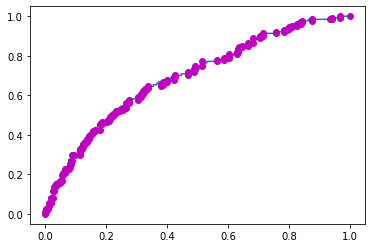

In [45]:
from matplotlib.pyplot import plot
plot(fpr2, tpr2)
plot(fpr, tpr,'mo')

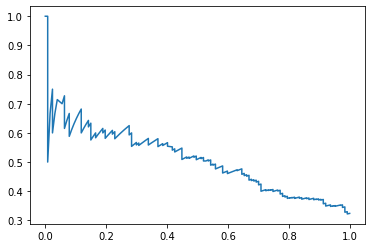

In [46]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds2_1 = precision_recall_curve(dfp2["label"], dfp2["p"], pos_label=1)
plot(recall, precision)